In [3]:
codes = {'AL': 'Alabama',
'AK': 'Alaska',
'AZ': 'Arizona',
'AR': 'Arkansas',
'CA': 'California',
'CO': 'Colorado',
'CT': 'Connecticut',
'DE': 'Delaware',
'FL': 'Florida',
'GA': 'Georgia',
'HI': 'Hawaii',
'ID': 'Idaho',
'IL': 'Illinois',
'IN': 'Indiana',
'IA': 'Iowa',
'KS': 'Kansas',
'KY': 'Kentucky[B]',
'LA': 'Louisiana',
'ME': 'Maine',
'MD': 'Maryland',
'MA': 'Massachusetts[B]',
'MI': 'Michigan',
'MN': 'Minnesota',
'MS': 'Mississippi',
'MO': 'Missouri',
'MT': 'Montana',
'NE': 'Nebraska',
'NV': 'Nevada',
'NH': 'New Hampshire',
'NJ': 'New Jersey',
'NM': 'New Mexico',
'NY': 'New York',
'NC': 'North Carolina',
'ND': 'North Dakota',
'OH': 'Ohio',
'OK': 'Oklahoma',
'OR': 'Oregon',
'PA': 'Pennsylvania[B]',
'RI': 'Rhode Island',
'SC': 'South Carolina',
'SD': 'South Dakota',
'TN': 'Tennessee',
'TX': 'Texas',
'UT': 'Utah',
'VT': 'Vermont',
'VA': 'Virginia[B]',
'WA': 'Washington',
'WV': 'West Virginia',
'WI': 'Wisconsin',
'WY': 'Wyoming'}

In [4]:
print("The no. of states in USA are:", len(codes))

The no. of states in USA are: 50


In [40]:
import pandas as pd
import json
import csv 
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

In [6]:
##TRIPS BY DISTANCE

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'Trips_by_Distance_20231107.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [7]:
# Filter the dataset for the year 2022
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime format
df_2022 = df[df['Date'].dt.year == 2022]

# Grouping by 'State Postal Code' and calculating the sum of 'Number of Trips'
trips_by_state = df_2022.groupby('State Postal Code')['Number of Trips'].sum().to_dict()

new_d_trips={}
for key in trips_by_state:
    if key in codes:
        new_d_trips[codes[key]] = trips_by_state[key]

print(json.dumps(new_d_trips, indent=4))
print(len(new_d_trips))

{
    "Alaska": 1924401459.0,
    "Alabama": 13331752210.0,
    "Arkansas": 8080621621.0,
    "Arizona": 18941870263.0,
    "California": 94711239723.0,
    "Colorado": 19127519700.0,
    "Connecticut": 10620993964.0,
    "Delaware": 2733893387.0,
    "Florida": 56979581628.0,
    "Georgia": 28922241280.0,
    "Hawaii": 3654215231.0,
    "Iowa": 10073949957.0,
    "Idaho": 4526353413.0,
    "Illinois": 40642194203.0,
    "Indiana": 21390229885.0,
    "Kansas": 9607744856.0,
    "Kentucky[B]": 14201195885.0,
    "Louisiana": 14649373693.0,
    "Massachusetts[B]": 24560348565.0,
    "Maryland": 17928243384.0,
    "Maine": 4062640990.0,
    "Michigan": 30215535831.0,
    "Minnesota": 17396674960.0,
    "Missouri": 17959928209.0,
    "Mississippi": 7976339185.0,
    "Montana": 2738616527.0,
    "North Carolina": 30811854958.0,
    "North Dakota": 2187858890.0,
    "Nebraska": 6014752219.0,
    "New Hampshire": 4363665368.0,
    "New Jersey": 26781725222.0,
    "New Mexico": 6565454165.0,
 

In [8]:
##US CENSUS

# Replace 'your_file.csv' with the actual path to your CSV file
file_path_us = 'uscensus-income-allstates-22.csv'

# Read the CSV file into a DataFrame
uscensus = pd.read_csv(file_path_us)

# Display the first few rows of the DataFrame
#print(uscensus.head())

In [60]:
mean_income_by_state = defaultdict(dict)

with open(file_path_us, newline='') as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)  # Read the headers
    detailed_column_names = next(reader)

    for row in reader:
        mean_income_by_state[row[1]] = int(row[122])


mean_income_by_state.pop('Puerto Rico')
mean_income_by_state.pop('United States')
mean_income_by_state.pop('District of Columbia')

print(json.dumps(mean_income_by_state, indent=4))
print(len(mean_income_by_state))

{
    "Alabama": 47145,
    "Alaska": 74242,
    "Arizona": 66724,
    "Arkansas": 45384,
    "California": 89374,
    "Colorado": 77519,
    "Connecticut": 72770,
    "Delaware": 62657,
    "Florida": 64627,
    "Georgia": 61965,
    "Hawaii": 76308,
    "Idaho": 57863,
    "Illinois": 65371,
    "Indiana": 53033,
    "Iowa": 54531,
    "Kansas": 54058,
    "Kentucky": 48151,
    "Louisiana": 47270,
    "Maine": 55434,
    "Maryland": 77318,
    "Massachusetts": 82617,
    "Michigan": 56097,
    "Minnesota": 65533,
    "Mississippi": 40989,
    "Missouri": 52852,
    "Montana": 58278,
    "Nebraska": 54076,
    "Nevada": 66078,
    "New Hampshire": 75262,
    "New Jersey": 78512,
    "New Mexico": 55207,
    "New York": 78600,
    "North Carolina": 58122,
    "North Dakota": 55371,
    "Ohio": 54221,
    "Oklahoma": 49318,
    "Oregon": 66755,
    "Pennsylvania": 60489,
    "Rhode Island": 65595,
    "South Carolina": 53647,
    "South Dakota": 57250,
    "Tennessee": 56860,
    "Texa

In [61]:
##BUSINESS

# Replace 'data.json' with the actual path to your JSON file
file_path = "business.json"

# Reading the JSON file
data = []
with open(file_path, 'r') as file:
    for line in file:
        try:
            json_obj = json.loads(line)
            data.append(json_obj)
        except json.JSONDecodeError as e:
            print(f"Error loading JSON: {e}")
            continue

state_ratings = defaultdict(list)

for business in data:
    if 'state' in business:
        state = business['state']
        star_rating = business.get('stars')
        if star_rating is not None:
            state_ratings[state].append(star_rating)

mean_ratings = {state: sum(ratings)/ len(ratings) for state, ratings in state_ratings.items()}

new_d_ratings={}
for key in mean_ratings:
    if key in codes:
        new_d_ratings[codes[key]] = mean_ratings[key]
        
print(json.dumps(new_d_ratings, indent=4))
print(len(new_d_ratings))

{
    "California": 3.9967326542379396,
    "Missouri": 3.546091817098873,
    "Arizona": 3.5920096852300243,
    "Pennsylvania[B]": 3.5730191838773173,
    "Tennessee": 3.571499668214997,
    "Florida": 3.6109570831750855,
    "Indiana": 3.5882457544234017,
    "Louisiana": 3.679161628375655,
    "Nevada": 3.7368762151652626,
    "Idaho": 3.7076337586747257,
    "Delaware": 3.3549668874172185,
    "Illinois": 3.3696969696969696,
    "New Jersey": 3.4591143392689783,
    "North Carolina": 2.0,
    "Colorado": 4.0,
    "Washington": 3.5,
    "Hawaii": 4.25,
    "Utah": 4.5,
    "Texas": 2.875,
    "Montana": 5.0,
    "Michigan": 2.5,
    "South Dakota": 4.5,
    "Massachusetts[B]": 1.25,
    "Vermont": 4.5
}
24


                            OLS Regression Results                            
Dep. Variable:                Ratings   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     2.971
Date:                Tue, 05 Dec 2023   Prob (F-statistic):             0.0754
Time:                        18:05:55   Log-Likelihood:                -18.971
No. Observations:                  22   AIC:                             43.94
Df Residuals:                      19   BIC:                             47.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6173      0.839      3.119      0.0

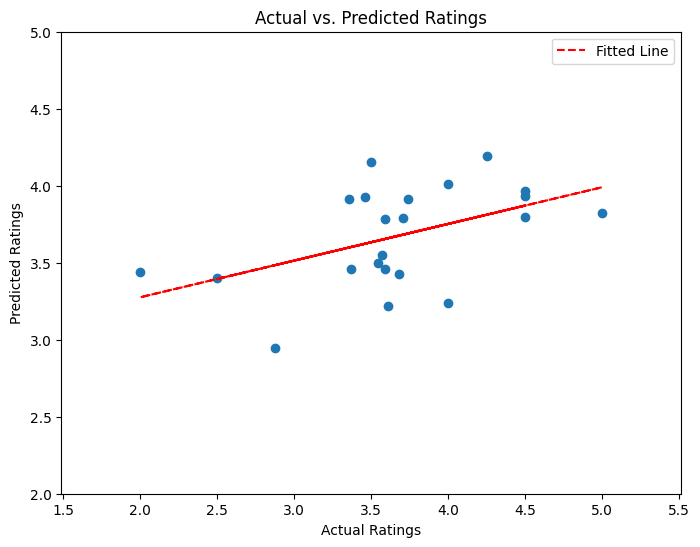

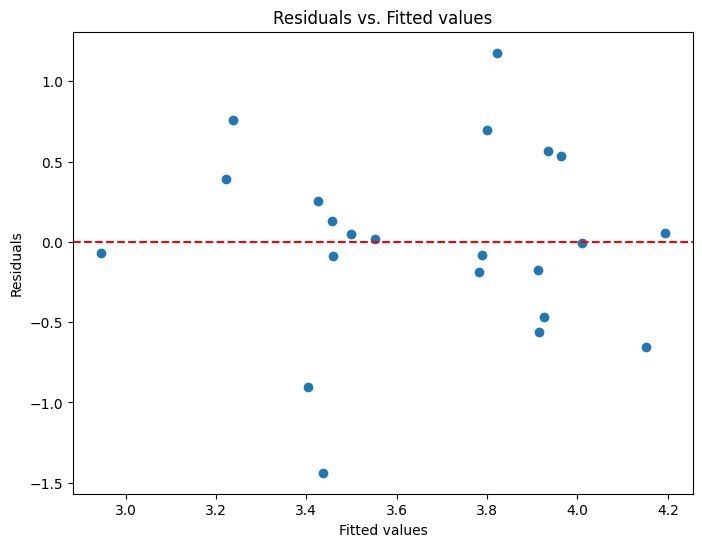

R-squared value: 0.2382437640926124
Mean Squared Error (MSE): 0.32849435294941093


In [67]:
import pandas as pd
import statsmodels.api as sm

valid_states = set(new_d_ratings.keys())
filtered_trips = {state: trips for state, trips in new_d_trips.items() if state in valid_states}
filtered_income = {state: income for state, income in mean_income_by_state.items() if state in valid_states}


trips_df = pd.DataFrame(list(filtered_trips.items()), columns=['State', 'Trips'])
income_df = pd.DataFrame(list(filtered_income.items()), columns=['State', 'MeanIncome'])
ratings_df = pd.DataFrame(list(new_d_ratings.items()), columns=['State', 'Ratings'])

merged_df = pd.merge(trips_df, income_df, on='State', how='inner')
merged_df = pd.merge(merged_df, ratings_df, on='State', how='inner')

# print(merged_df_2)

if merged_df.empty:
    print("Merged DataFrame is empty. Check your data.")
else:
    # Convert columns to numeric if needed
    merged_df['Trips'] = pd.to_numeric(merged_df['Trips'])
    merged_df['MeanIncome'] = pd.to_numeric(merged_df['MeanIncome'])
    merged_df['Ratings'] = pd.to_numeric(merged_df['Ratings'])

    # Regression model
    X = merged_df[['Trips', 'MeanIncome']]
    y = merged_df['Ratings']

    X = sm.add_constant(X)  # Add a constant (intercept) term
    model = sm.OLS(y, X).fit()  # Ordinary Least Squares (OLS) regression fit

    # Print model summary
    print(model.summary())

    # Actual vs. Predicted plot
    predicted = model.predict(X)
    plt.figure(figsize=(8, 6))
    
    # Set equal axis and adjust limits
    plt.axis('equal')  # Set equal aspect ratio
    axes_min = min(min(y), min(predicted))  # Minimum of both axes
    axes_max = max(max(y), max(predicted))  # Maximum of both axes
    plt.xlim(axes_min, axes_max)  # Set x-axis limits
    plt.ylim(axes_min, axes_max)  # Set y-axis limits
    
    plt.scatter(y, predicted)
    plt.xlabel('Actual Ratings')
    plt.ylabel('Predicted Ratings')
    plt.title('Actual vs. Predicted Ratings')
    # plt.show()

    # Fit a line to the scatter plot
    p = np.polyfit(y, predicted, 1)  # Fit a first-degree polynomial (line)
    plt.plot(y, np.polyval(p, y), color='red', linestyle='--', label='Fitted Line')

    plt.legend()
    plt.show()

    # Residuals plot
    residuals = model.resid
    plt.figure(figsize=(8, 6))
    plt.scatter(predicted, residuals)
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Fitted values')
    plt.axhline(y=0, color='r', linestyle='--')  # Adding horizontal line at y=0
    plt.show()

    # #Scatter plot for ratings and no. of trips
    # plt.figure(figsize=(8, 6))
    # plt.scatter(merged_df['Trips'], merged_df['Ratings'])
    # plt.xlabel('Number of Trips')
    # plt.ylabel('Ratings')
    # plt.title('Relation between Number of Trips and Ratings')
    # plt.show()

    # #Scatter plot for MeanIncome and Ratings
    # plt.figure(figsize=(8, 6))
    # plt.scatter(merged_df['MeanIncome'], merged_df['Ratings'])
    # plt.xlabel('Mean Income')
    # plt.ylabel('Ratings')
    # plt.title('Relation between Mean Income and Ratings')
    # plt.show()

    # R-squared value
    r_squared = model.rsquared
    print(f"R-squared value: {r_squared}")

    # Mean Squared Error (MSE)
    predicted = model.predict(X)
    mse = mean_squared_error(y, predicted)
    print(f"Mean Squared Error (MSE): {mse}")